<a href="https://colab.research.google.com/github/prolibrium/CycleGANProj/blob/main/CycleGANPrashanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U tensorflow-addons

     |████████████████████████████████| 1.1 MB 9.6 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

import numpy as np
import matplotlib.pyplot as plt

import cv2
from glob import glob
import os

In [ ]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()

In [ ]:
!unzip "/content/drive/MyDrive/vangogh.zip" -d "/content/sample_data/vangogh"

Archive:  /content/drive/MyDrive/vangogh.zip
  inflating: /content/sample_data/vangogh/Arles/A Field of Yellow Flowers.jpg  
  inflating: /content/sample_data/vangogh/Arles/A L Arlesienne Madame Ginoux with Gloves and Umbre.jpg  
  inflating: /content/sample_data/vangogh/Arles/A Lane in the Public Garden at Arles.jpg  
  inflating: /content/sample_data/vangogh/Arles/A Lane near Arles.jpg  
  inflating: /content/sample_data/vangogh/Arles/A Pair of Leather Clogs.jpg  
  inflating: /content/sample_data/vangogh/Arles/A Pair of Shoes.jpg  
  inflating: /content/sample_data/vangogh/Arles/A Pork-Butcher s Shop Seen from a Window.jpg  
  inflating: /content/sample_data/vangogh/Arles/Almond Tree in Blossom.jpg  
  inflating: /content/sample_data/vangogh/Arles/Apricot Trees in Blossom 2.jpg  
  inflating: /content/sample_data/vangogh/Arles/Apricot Trees in Blossom.jpg  
  inflating: /content/sample_data/vangogh/Arles/Arles View from the Wheat Fields.jpg  
  inflating: /content/sample_data/vangog

In [ ]:
!unzip "/content/drive/MyDrive/daonelite.zip" -d "/media"

Archive:  /content/drive/MyDrive/daonelite.zip
  inflating: /media/daone/00068bc07f.jpg  
  inflating: /media/daone/000910d219.jpg  
  inflating: /media/daone/000ded5c41.jpg  
  inflating: /media/daone/00104fd531.jpg  
  inflating: /media/daone/001158d595.jpg  
  inflating: /media/daone/0033c5f971.jpg  
  inflating: /media/daone/0039ebb598.jpg  
  inflating: /media/daone/003aab6fdd.jpg  
  inflating: /media/daone/003c6c30e0.jpg  
  inflating: /media/daone/00479e2a21.jpg  
  inflating: /media/daone/005f987f56.jpg  
  inflating: /media/daone/0080f94ebc.jpg  
  inflating: /media/daone/00882b7e1d.jpg  
  inflating: /media/daone/009d534136.jpg  
  inflating: /media/daone/009ddaed1f.jpg  
  inflating: /media/daone/00aeb60e25.jpg  
  inflating: /media/daone/00c6a0ad1e.jpg  
  inflating: /media/daone/00dcf0f1e3.jpg  
  inflating: /media/daone/00dff09ebe.jpg  
  inflating: /media/daone/00e1798585.jpg  
  inflating: /media/daone/00e64e1b2c.jpg  
  inflating: /media/daone/00f78547f0.jpg  
  infla

In [ ]:
import shutil

shutil.rmtree('/content/sample_data/vangogh/Works of the young van Gogh')

In [ ]:
main_path ="/content/sample_data/vangogh"
style_img_paths = []
for class_path in [os.path.join(main_path,class_name) for class_name in os.listdir(main_path)]:

    class_img_paths = glob(class_path+"/*")
    for class_img_path in class_img_paths:
        style_img_paths.append(class_img_path)

print("Number of Painting Images".format(len(style_img_paths)))

There are 835 style images in the Paintings Dataset


In [ ]:
main_path = "/media"
normal_image_paths = []
for class_path in [os.path.join(main_path,class_name) for class_name in os.listdir(main_path)]:

    class_img_paths = glob(class_path+"/*")
    for class_img_path in class_img_paths:
        normal_image_paths.append(class_img_path)


print("Number of real images:".format(len(normal_image_paths)))

There are 3741 natural images in the Natural Images Dataset


In [ ]:
style_images = []
normal_images = []

for style_path in style_img_paths:
  try:
    img = cv2.imread(style_path)
    img = cv2.resize(img,(256,256))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    style_images.append(img)
  except Exception as e:

    print(str(e))


for normal_path in normal_image_paths:
    img = cv2.imread(normal_path)
    img = cv2.resize(img,(256,256))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    normal_images.append(img)

print(len(style_images))
print(len(normal_images))

835
3741


In [ ]:
style_images = np.array(style_images,dtype=np.float32)
normal_images = np.array(normal_images,dtype=np.float32)

style_images = style_images / 127.5 - 1
normal_images = normal_images / 127.5 - 1

style_images = tf.data.Dataset.from_tensor_slices(style_images).batch(1)
normal_images = tf.data.Dataset.from_tensor_slices(normal_images).batch(1)

In [ ]:
example_painting = next(iter(style_images))
example_photo = next(iter(normal_images))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

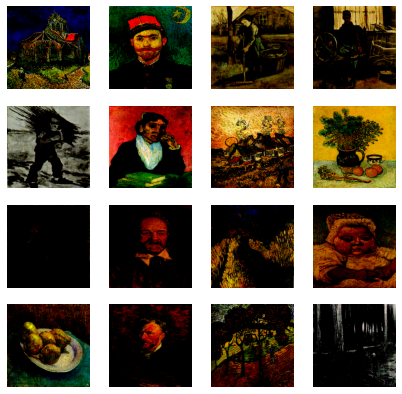

In [ ]:
plt.figure(figsize=(7,7))
plt.title("Style Images")
for i,image in enumerate(style_images.shuffle(10000).take(16)):
    plt.subplot(4,4,i+1)
    plt.imshow(image[0])
    plt.axis("off")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

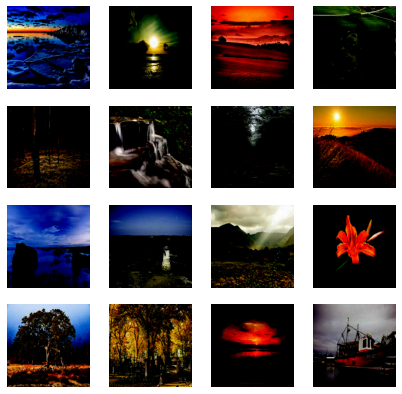

In [ ]:
plt.figure(figsize=(7,7))
plt.title("Natural Images")
for i,image in enumerate(normal_images.shuffle(10000).take(16)):
    plt.subplot(4,4,i+1)
    plt.imshow(image[0])
    plt.axis("off")
plt.show()

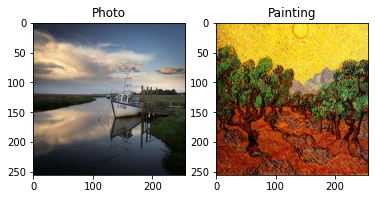

In [ ]:
plt.subplot(121)
plt.title('Photo')
plt.imshow(example_photo[0] * 0.5 + 0.5)
# plt.imshow(example_photo[0])

plt.subplot(122)
plt.title('Painting')
plt.imshow(example_painting[0] * 0.5 + 0.5)

In [ ]:
OUTPUT_CHANNELS = 3

def downsample(filters, size, apply_instancenorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0., stddev=0.02)

    model_down = tf.keras.Sequential()
    model_down.add(layers.Conv2D(filters, size, strides=2, padding='same',
                                kernel_initializer=initializer, use_bias=False))

    if apply_instancenorm:
        model_down.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    model_down.add(layers.LeakyReLU())

    return model_down


In [ ]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0., stddev=0.02)

    model_up = tf.keras.Sequential()
    model_up.add(layers.Conv2DTranspose(filters, size, strides=2, padding='same',
                                kernel_initializer=initializer, use_bias=False))

    model_up.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    if apply_dropout:
        model_up.add(layers.Dropout(0.5))

    model_up.add(layers.ReLU())

    return model_up

In [ ]:
def Generator():
    inputs = layers.Input([256,256,3])

    down_stack = [
        downsample(64, 4, apply_instancenorm=False),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4, apply_dropout=True),
        upsample(512, 4),
        upsample(256, 4),
        upsample(128, 4),
        upsample(64, 4),
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = layers.Conv2DTranspose(OUTPUT_CHANNELS, 4, strides=2, padding='same',
                                kernel_initializer=initializer, activation='tanh')

    x = inputs

    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = layers.Concatenate()([x, skip])

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
Generator()

In [ ]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0., stddev=0.02)

    inp = layers.Input(shape=[256, 256, 3], name='input_image')

    x = inp

    down1 = downsample(64, 4, False)(x)
    down2 = downsample(128, 4)(down1)
    down3 = downsample(256, 4)(down2)

    zero_pad1 = layers.ZeroPadding2D()(down3)

    conv = layers.Conv2D(512, 4, strides=1,
                        kernel_initializer=initializer, use_bias=False)(zero_pad1)

    norm1 = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(conv)

    leaky_relu = layers.LeakyReLU()(norm1)

    zero_pad2 = layers.ZeroPadding2D()(leaky_relu)

    last = layers.Conv2D(1, 4, strides=1,
                        kernel_initializer=initializer)(zero_pad2)

    return tf.keras.Model(inputs=inp, outputs=last)

In [ ]:
Discriminator()

In [ ]:
with strategy.scope():
    painting_generator = Generator()
    photo_generator = Generator()

    painting_discriminator = Discriminator()
    photo_discriminator = Discriminator()

In [ ]:
class CycleGan(tf.keras.Model):
    def __init__(
        self,
        painting_generator,
        photo_generator,
        painting_discriminator,
        photo_discriminator,
        lambda_cycle=10):
        super(CycleGan, self).__init__()
        self.pn_gen = painting_generator
        self.p_gen = photo_generator
        self.pn_disc = painting_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle

    def compile(
        self,
        pn_gen_optimizer,
        p_gen_optimizer,
        pn_disc_optimizer,
        p_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn,
        aug_fn
        ):
        super(CycleGan, self).compile()
        self.pn_gen_optimizer = pn_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.pn_disc_optimizer = pn_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
        self.aug_fn = aug_fn

    def train_step(self, batch_data):
        real_painting, real_photo = batch_data
        batch_size = tf.shape(real_painting)[0]

        with tf.GradientTape(persistent=True) as tape:
            fake_painting = self.pn_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_painting, training=True)

            fake_photo = self.p_gen(real_painting, training=True)
            cycled_painting = self.pn_gen(fake_photo, training=True)

            same_painting = self.pn_gen(real_painting, training=True)
            same_photo = self.p_gen(real_photo, training=True)


            both_painting = tf.concat([real_painting, fake_painting], axis=0)
            aug_painting = self.aug_fn(both_painting)

            aug_real_painting = aug_painting[:batch_size]
            aug_fake_painting = aug_painting[batch_size:]

            disc_real_painting = self.pn_disc(aug_real_painting, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)

            disc_fake_painting = self.pn_disc(aug_fake_painting, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)

            painting_gen_loss = self.gen_loss_fn(disc_fake_painting)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)

            total_cycle_loss = self.cycle_loss_fn(real_painting, cycled_painting, self.lambda_cycle) + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)

            total_painting_gen_loss = total_cycle_loss + painting_gen_loss + self.identity_loss_fn(real_painting,same_painting, self.lambda_cycle)
            total_photo_gen_loss = total_cycle_loss + photo_gen_loss + self.identity_loss_fn(real_photo,same_photo, self.lambda_cycle)

            painting_disc_loss = self.disc_loss_fn(disc_real_painting, disc_fake_painting)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        painting_generator_gradients = tape.gradient(total_painting_gen_loss, self.pn_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss, self.p_gen.trainable_variables)

        painting_discriminator_gradients = tape.gradient(painting_disc_loss, self.pn_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss, self.p_disc.trainable_variables)

        self.pn_gen_optimizer.apply_gradients(zip(painting_generator_gradients, self.pn_gen.trainable_variables))
        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients, self.p_gen.trainable_variables))
        self.pn_disc_optimizer.apply_gradients(zip(painting_discriminator_gradients, self.pn_disc.trainable_variables))
        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients, self.p_disc.trainable_variables))

        return {
            "painting_gen_loss":total_painting_gen_loss,
            "photo_gen_loss":total_photo_gen_loss,
            "painting_disc_loss":painting_disc_loss,
            "photo_disc_loss":photo_disc_loss
        }

In [ ]:
with strategy.scope():
    def discriminator_loss(real, generated):
        real_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(real), real)

        generator_loss = tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.zeros_like(generated), generated)

        total_disc_loss = real_loss + generator_loss

        return 0.5*total_disc_loss

In [ ]:
with strategy.scope():
    def generator_loss(generated):
        return tf.keras.losses.BinaryCrossentropy(from_logits=True, reduction=tf.keras.losses.Reduction.NONE)(tf.ones_like(generated), generated)

In [ ]:
with strategy.scope():
    def cycle_loss(real_image, cycled_image, LAMBDA):
        return LAMBDA*(tf.reduce_mean(tf.abs(real_image-cycled_image)))

In [ ]:
with strategy.scope():
    def identity_loss(real_image, gen_image, LAMBDA):
        return 0.5*LAMBDA*(tf.reduce_mean(tf.abs(real_image-gen_image)))



In [ ]:
with strategy.scope():
# from https://github.com/mit-han-lab/data-efficient-gans/blob/master/DiffAugment_tf.py

    def DiffAugment(x, policy='', channels_first=False):
        if policy:
            if channels_first:
                x = tf.transpose(x, [0, 2, 3, 1])
            for p in policy.split(','):
                for f in AUGMENT_FNS[p]:
                    x = f(x)
            if channels_first:
                x = tf.transpose(x, [0, 3, 1, 2])
        return x


    def rand_brightness(x):
        magnitude = tf.random.uniform([tf.shape(x)[0], 1, 1, 1]) - 0.5
        x = x + magnitude
        return x


    def rand_saturation(x):
        magnitude = tf.random.uniform([tf.shape(x)[0], 1, 1, 1]) * 2
        x_mean = tf.reduce_sum(x, axis=3, keepdims=True) * 0.3333333333333333333
        x = (x - x_mean) * magnitude + x_mean
        return x


    def rand_contrast(x):
        magnitude = tf.random.uniform([tf.shape(x)[0], 1, 1, 1]) + 0.5
        x_mean = tf.reduce_sum(x, axis=[1, 2, 3], keepdims=True) * 5.086e-6
        x = (x - x_mean) * magnitude + x_mean
        return x

    def rand_translation(x, ratio=0.125):
        batch_size = tf.shape(x)[0]
        image_size = tf.shape(x)[1:3]
        shift = tf.cast(tf.cast(image_size, tf.float32) * ratio + 0.5, tf.int32)
        translation_x = tf.random.uniform([batch_size, 1], -shift[0], shift[0] + 1, dtype=tf.int32)
        translation_y = tf.random.uniform([batch_size, 1], -shift[1], shift[1] + 1, dtype=tf.int32)
        grid_x = tf.clip_by_value(tf.expand_dims(tf.range(image_size[0], dtype=tf.int32), 0) + translation_x + 1, 0, image_size[0] + 1)
        grid_y = tf.clip_by_value(tf.expand_dims(tf.range(image_size[1], dtype=tf.int32), 0) + translation_y + 1, 0, image_size[1] + 1)
        x = tf.gather_nd(tf.pad(x, [[0, 0], [1, 1], [0, 0], [0, 0]]), tf.expand_dims(grid_x, -1), batch_dims=1)
        x = tf.transpose(tf.gather_nd(tf.pad(tf.transpose(x, [0, 2, 1, 3]), [[0, 0], [1, 1], [0, 0], [0, 0]]), tf.expand_dims(grid_y, -1), batch_dims=1), [0, 2, 1, 3])
        return x


    def rand_cutout(x, ratio=0.5):
        batch_size = tf.shape(x)[0]
        image_size = tf.shape(x)[1:3]
        cutout_size = tf.cast(tf.cast(image_size, tf.float32) * ratio + 0.5, tf.int32)
        offset_x = tf.random.uniform([tf.shape(x)[0], 1, 1], maxval=image_size[0] + (1 - cutout_size[0] % 2), dtype=tf.int32)
        offset_y = tf.random.uniform([tf.shape(x)[0], 1, 1], maxval=image_size[1] + (1 - cutout_size[1] % 2), dtype=tf.int32)
        grid_batch, grid_x, grid_y = tf.meshgrid(tf.range(batch_size, dtype=tf.int32), tf.range(cutout_size[0], dtype=tf.int32), tf.range(cutout_size[1], dtype=tf.int32), indexing='ij')
        cutout_grid = tf.stack([grid_batch, grid_x + offset_x - cutout_size[0] // 2, grid_y + offset_y - cutout_size[1] // 2], axis=-1)
        mask_shape = tf.stack([batch_size, image_size[0], image_size[1]])
        cutout_grid = tf.maximum(cutout_grid, 0)
        cutout_grid = tf.minimum(cutout_grid, tf.reshape(mask_shape - 1, [1, 1, 1, 3]))
        mask = tf.maximum(1 - tf.scatter_nd(cutout_grid, tf.ones([batch_size, cutout_size[0], cutout_size[1]], dtype=tf.float32), mask_shape), 0)
        x = x * tf.expand_dims(mask, axis=3)
        return x


    AUGMENT_FNS = {
        'color': [rand_brightness, rand_saturation, rand_contrast],
        'translation': [rand_translation],
        'cutout': [rand_cutout],
}
    def aug_fn(image):
        return DiffAugment(image,"color,translation,cutout")



In [ ]:
with strategy.scope():
    painting_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

    painting_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    photo_discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)



In [ ]:
with strategy.scope():
    cycle_gan_model = CycleGan(painting_generator, photo_generator, painting_discriminator, photo_discriminator)

    cycle_gan_model.compile(
        pn_gen_optimizer = painting_generator_optimizer,
        p_gen_optimizer = photo_generator_optimizer,
        pn_disc_optimizer = painting_discriminator_optimizer,
        p_disc_optimizer = photo_discriminator_optimizer,
        gen_loss_fn = generator_loss,
        disc_loss_fn = discriminator_loss,
        cycle_loss_fn = cycle_loss,
        identity_loss_fn = identity_loss,
        aug_fn = aug_fn
    )

In [ ]:
cycle_gan_model.fit(
    tf.data.Dataset.zip((style_images, normal_images)),
    epochs=20
)

Epoch 1/20
835/835 [==============================] - 264s 256ms/step - painting_gen_loss: 4.8915 - photo_gen_loss: 4.6896 - painting_disc_loss: 0.5834 - photo_disc_loss: 0.6142
Epoch 2/20
835/835 [==============================] - 214s 256ms/step - painting_gen_loss: 4.0912 - photo_gen_loss: 3.9475 - painting_disc_loss: 0.6189 - photo_disc_loss: 0.6050
Epoch 3/20
835/835 [==============================] - 214s 257ms/step - painting_gen_loss: 3.6984 - photo_gen_loss: 3.6386 - painting_disc_loss: 0.6407 - photo_disc_loss: 0.6042
Epoch 4/20
835/835 [==============================] - 214s 257ms/step - painting_gen_loss: 3.4645 - photo_gen_loss: 3.4967 - painting_disc_loss: 0.6474 - photo_disc_loss: 0.5907
Epoch 5/20
835/835 [==============================] - 213s 255ms/step - painting_gen_loss: 3.3024 - photo_gen_loss: 3.3506 - painting_disc_loss: 0.6475 - photo_disc_loss: 0.5970
Epoch 6/20
835/835 [==============================] - 213s 255ms/step - painting_gen_loss: 3.1636 - photo_gen_

In [ ]:
png = [4.8915,4.0912,3.6984,3.4645,3.3024,3.1636,3.0217,2.9060,2.8232,2.7567,2.6741,2.6235,2.6088,2.6010,2.5631,2.5327,2.4722,2.4714,2.4609,2.4590]
pnd = [0.5834,0.6189,0.6407,0.6474,0.6475,0.6479,0.6526,0.6497,0.6464,0.6491,0.6473,0.6509,0.6509,0.6449,0.6534,0.6600,0.6615,0.6610,0.6565,0.6565]
phg = [4.6896,3.9475,3.6386,3.4967,3.3506,3.2400,3.1150,3.0144,2.9080,2.8458,2.7719,2.7452,2.7207,2.7211,2.6948,2.7072,2.6492,2.6545,2.6253,2.6077]
phd = [0.6142,0.6050,0.6042,0.5907,0.5970,0.5949,0.6011,0.6019,0.6074,0.6059,0.6032,0.5973,0.6005,0.5924,0.5973,0.5898,0.5950,0.5924,0.5915,0.5944]

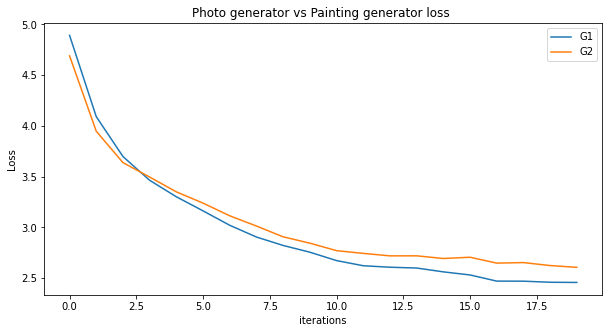

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Photo generator vs Painting generator loss ")
plt.plot(png,label="G1")
plt.plot(phg,label="G2")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

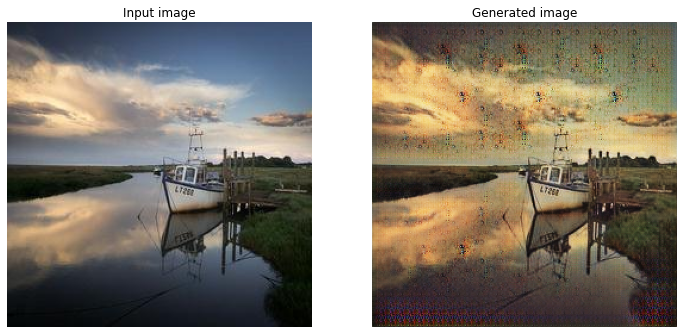

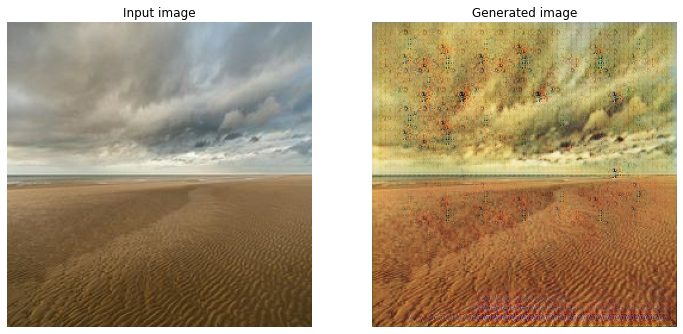

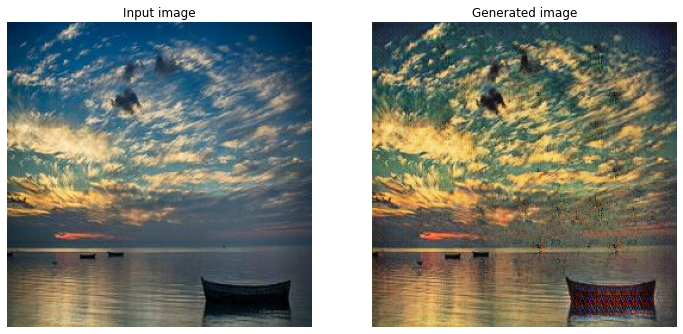

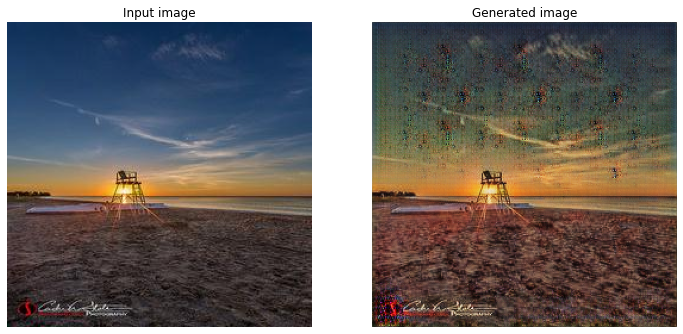

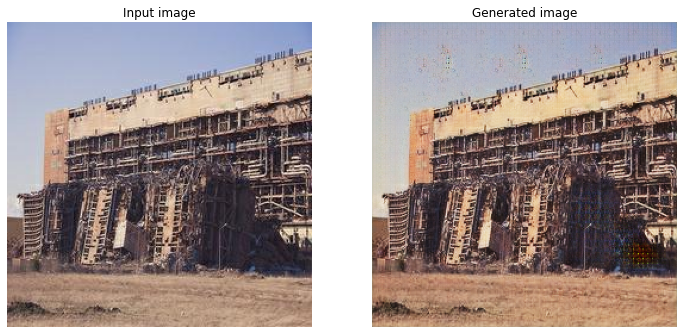

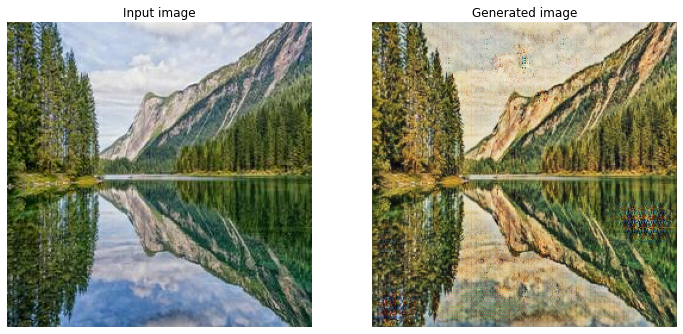

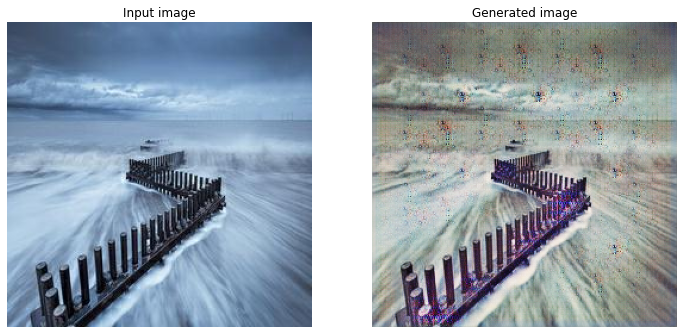

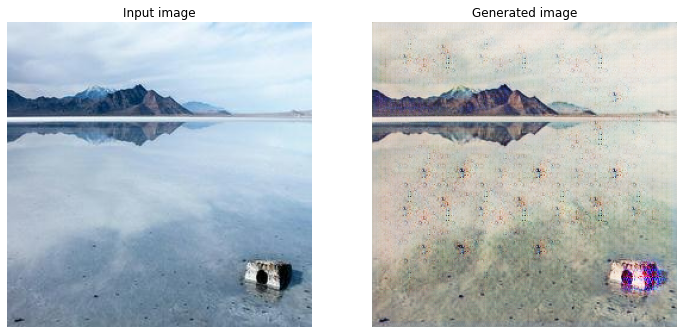

In [ ]:
ds_iter = iter(normal_images)
for n_sample in range(8):
    example_sample = next(ds_iter)
    generated_sample = painting_generator(example_sample)

    f = plt.figure(figsize=(12, 12))

    plt.subplot(121)
    plt.title('Input image')
    plt.imshow(example_sample[0] * 0.5 + 0.5)
    plt.axis('off')

    plt.subplot(122)
    plt.title('Generated image')
    plt.imshow(generated_sample[0] * 0.5 + 0.5)
    plt.axis('off')
    plt.show()

<function matplotlib.pyplot.show>

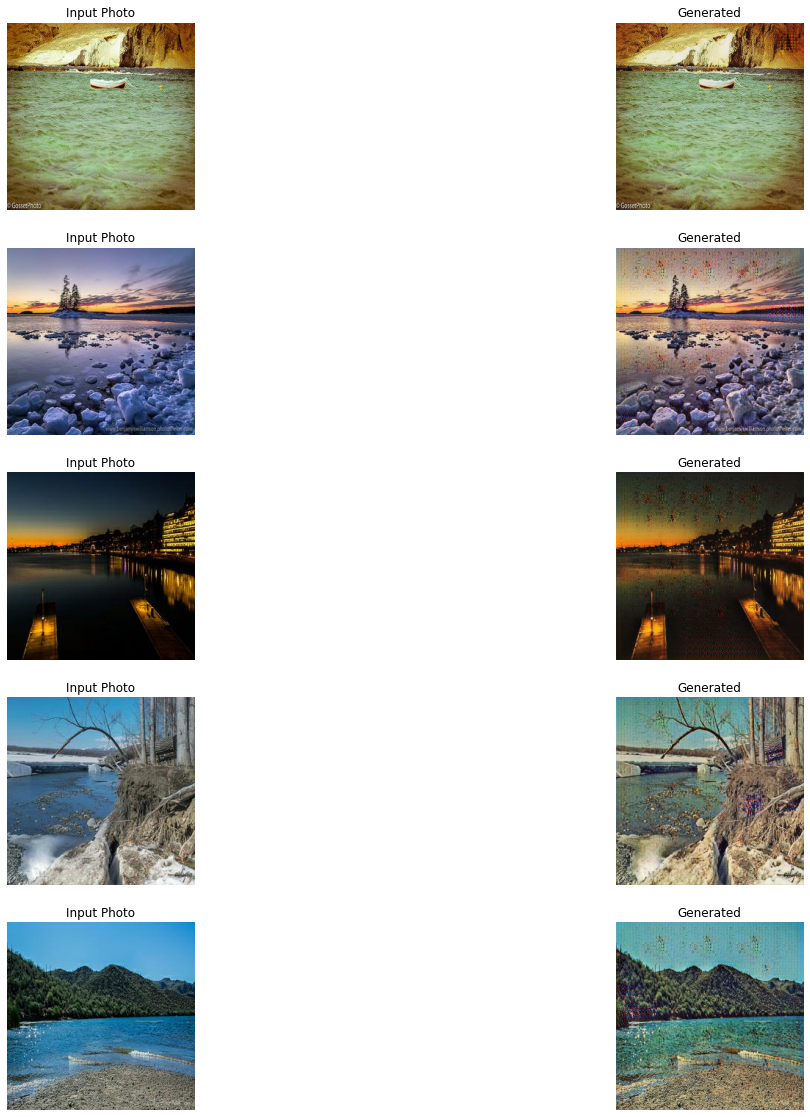

In [ ]:
_, ax = plt.subplots(5, 2, figsize=(20, 20))
for i, img in enumerate(normal_images.shuffle(1000).take(5)):
    prediction = painting_generator(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input Photo")
    ax[i, 1].set_title("Generated")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")
plt.show